In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Preprossing Data

In [5]:
df.drop(columns="Unnamed: 0", inplace=True)

<Axes: >

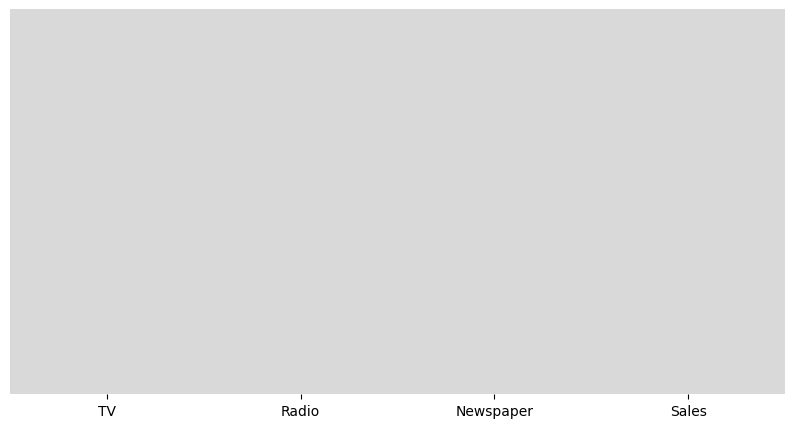

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'tab20c_r')

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Figure size 800x800 with 0 Axes>

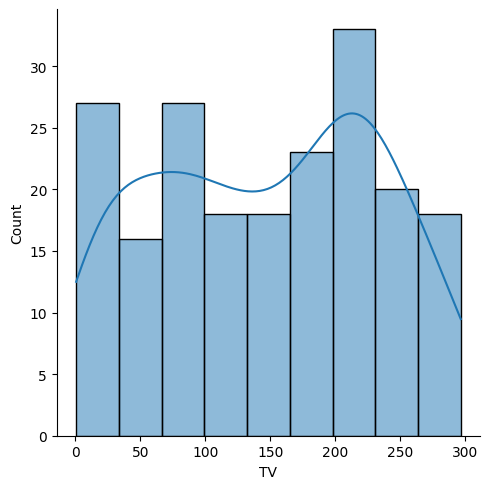

In [10]:
plt.figure(figsize=(8,8))
sns.displot(df['TV'], kde= True)
plt.show()

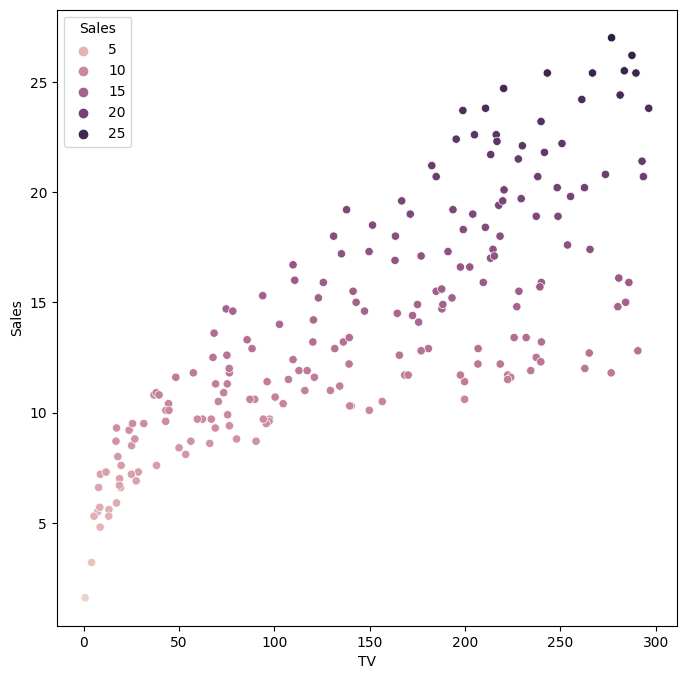

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="TV", y="Sales", hue="Sales", data=df)
plt.show()

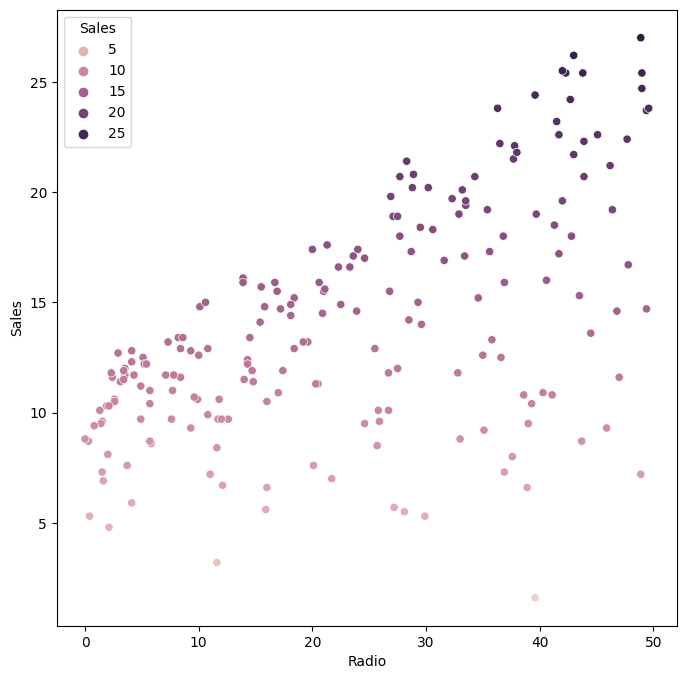

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Radio", y="Sales", hue="Sales", data=df)
plt.show()

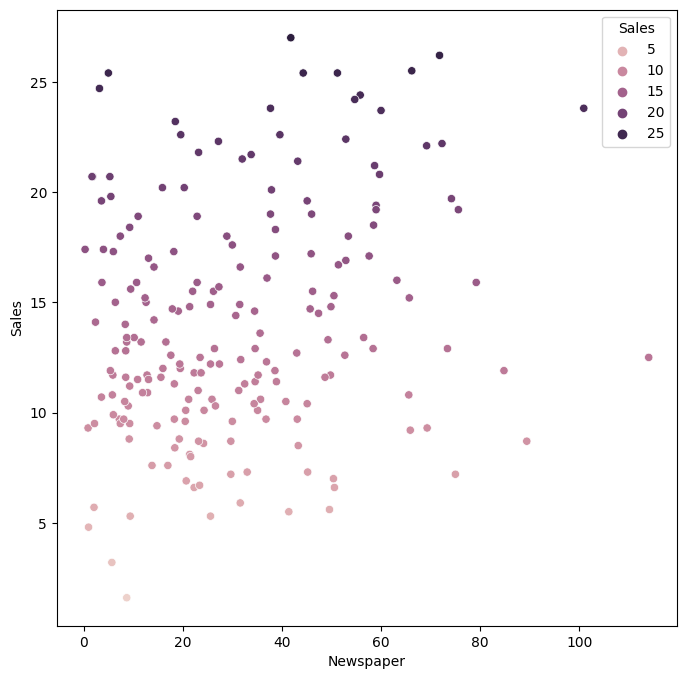

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Newspaper", y="Sales", hue="Sales", data=df)
plt.show()

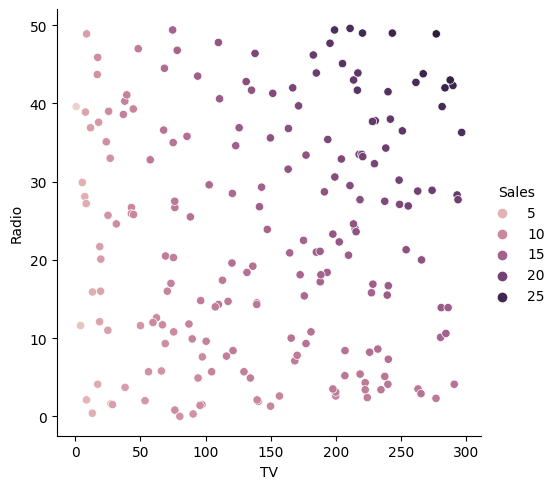

In [14]:
sns.relplot(x="TV", y="Radio", hue="Sales",kind="scatter", data=df) # scatter can be used instead of "line" plot
plt.show()

<Axes: >

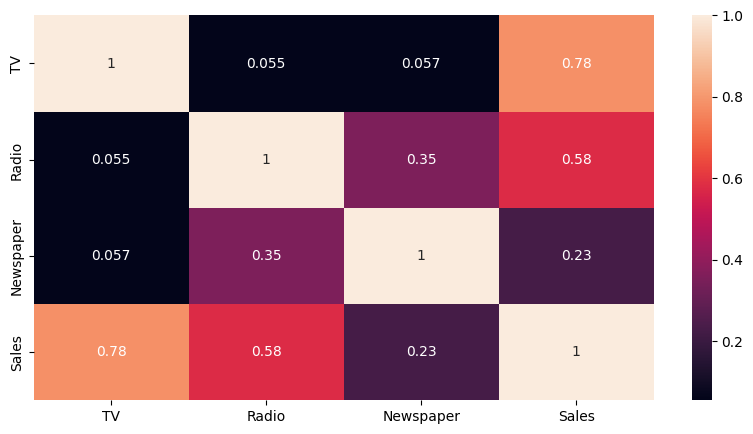

In [15]:
sns.heatmap(df.corr(),annot=True)

## Target Variable Splitting

In [16]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

In [17]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x = std.fit_transform(x)
numpy_array = y.values 
y_reshape = numpy_array.reshape(-1, 1)
y = std.fit_transform(y_reshape)

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [19]:
x_train

array([[-9.25304978e-01,  9.00494200e-01,  3.84117072e+00],
       [-8.80728498e-02, -1.42906863e+00, -1.82009791e-01],
       [-5.93681653e-01, -5.71519414e-01,  3.84181516e-01],
       [-1.49747198e+00, -1.05606848e-01,  9.13547372e-01],
       [-8.24883830e-01,  2.32010953e-01, -3.79946589e-01],
       [-9.08957349e-01, -1.86635121e-01, -5.64073843e-01],
       [-1.65394214e+00,  4.48086346e-01, -9.73756984e-01],
       [ 9.35989321e-01, -5.03995854e-01,  8.90531465e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [ 6.98948705e-01, -1.00367020e+00, -1.91216154e-01],
       [ 1.55486384e+00, -8.88880147e-01, -4.21375221e-01],
       [-3.48467222e-01, -5.78271770e-01, -1.15788424e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-1.66912209e+00, -7.87594807e-01, -1.14407469e+00],
       [ 1.39956136e+00,  1.38666383e+00

In [20]:
y_test

array([[ 0.1301784 ],
       [ 1.11011909],
       [-0.40782826],
       [ 0.51446886],
       [-0.86897682],
       [-1.426198  ],
       [ 1.18697718],
       [ 0.57211244],
       [-0.71526063],
       [ 1.16776266],
       [-0.59997349],
       [ 0.01489126],
       [-0.48468635],
       [ 1.8594855 ],
       [ 0.99483195],
       [-0.75368968],
       [-0.38861374],
       [-0.86897682],
       [-1.08033658],
       [ 1.43676599],
       [-1.23405277],
       [ 0.9564029 ],
       [ 2.49356478],
       [ 1.95555812],
       [-0.90740587],
       [-0.50390088],
       [ 1.2830498 ],
       [-0.83054778],
       [-0.2733266 ],
       [-0.90740587],
       [-0.92662039],
       [ 1.07169004],
       [-0.54232992],
       [-1.61834324],
       [ 0.59132696],
       [-0.8497623 ],
       [-0.65761706],
       [-0.83054778],
       [-1.29169634],
       [-0.67683159]])

## LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

lf  = LinearRegression()
lf.fit(x_train, y_train)

LinearRegression()

In [22]:
lin_pre = lf.predict(x_test)
lin_pre

array([[ 0.31904293],
       [ 1.06959093],
       [-0.51650129],
       [ 0.56665674],
       [-0.96460793],
       [-1.38280346],
       [ 1.20306137],
       [ 0.62024573],
       [-0.84510674],
       [ 0.99725671],
       [-0.33449467],
       [-0.04443511],
       [-0.07508684],
       [ 1.40153049],
       [ 0.84611506],
       [-0.80487694],
       [ 0.28163929],
       [-1.25188811],
       [-1.2770776 ],
       [ 1.22650112],
       [-1.23170617],
       [ 0.80595809],
       [ 2.0616747 ],
       [ 1.70020734],
       [-1.19645726],
       [-0.28174133],
       [ 1.43130059],
       [-1.17756656],
       [-0.32868154],
       [-0.30825456],
       [-0.64510885],
       [ 1.00248785],
       [-0.78786011],
       [-1.43901564],
       [ 0.62572959],
       [-1.23398439],
       [-0.9453857 ],
       [-1.13717904],
       [-0.68589178],
       [-0.67762946]])

In [23]:
results = np.column_stack((y_test, lin_pre))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.13 |          0.32
          1.11 |          1.07
         -0.41 |         -0.52
          0.51 |          0.57
         -0.87 |         -0.96
         -1.43 |         -1.38
          1.19 |          1.20
          0.57 |          0.62
         -0.72 |         -0.85
          1.17 |          1.00
         -0.60 |         -0.33
          0.01 |         -0.04
         -0.48 |         -0.08
          1.86 |          1.40
          0.99 |          0.85
         -0.75 |         -0.80
         -0.39 |          0.28
         -0.87 |         -1.25
         -1.08 |         -1.28
          1.44 |          1.23
         -1.23 |         -1.23
          0.96 |          0.81
          2.49 |          2.06
          1.96 |          1.70
         -0.91 |         -1.20
         -0.50 |         -0.28
          1.28 |          1.43
         -0.83 |         -1.18
         -0.27 |         -0.33
         -0.91 |         -0.31
     

In [24]:
residual = actual- lin_pre.reshape(-1)
print(residual)

[-9.95874516e-01 -1.74642251e+00 -1.60330299e-01 -1.24348833e+00
  2.87776345e-01  7.05971872e-01 -1.87989296e+00 -1.29707731e+00
  1.68275156e-01 -1.67408830e+00 -3.42336919e-01 -6.32396476e-01
 -6.01744751e-01 -2.07836208e+00 -1.52294664e+00  1.28045352e-01
 -9.58470879e-01  5.75056526e-01  6.00246017e-01 -1.90333271e+00
  5.54874580e-01 -1.48278968e+00 -2.73850629e+00 -2.37703893e+00
  5.19625674e-01 -3.95090255e-01 -2.10813218e+00  5.00734969e-01
 -3.48150045e-01 -3.68577031e-01 -3.17227364e-02 -1.67931944e+00
  1.11028526e-01  7.62184048e-01 -1.30256118e+00  5.57152801e-01
  2.68554112e-01  4.60347457e-01  9.06018992e-03  7.97868451e-04]


<Axes: ylabel='Density'>

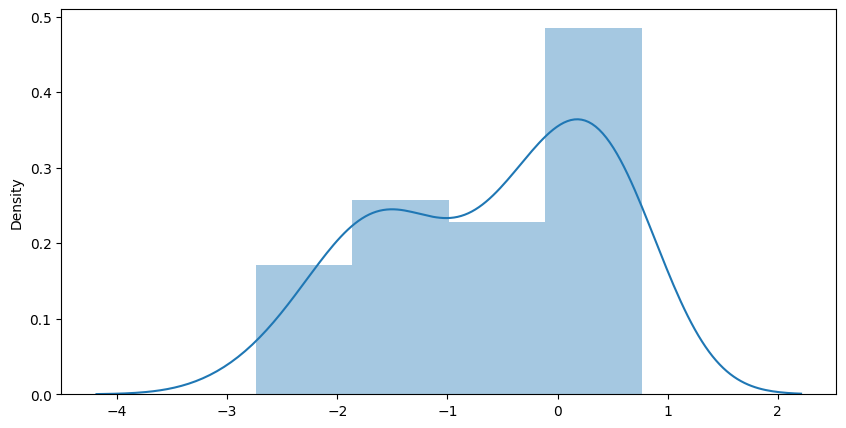

In [25]:
sns.distplot(residual, kde=True)

In [26]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, lin_pre)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.07618099281920124
Root Mean Squared Error: 0.276009044814117


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  0.053930584793338024


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  0.020292233991174784


## GradientBoostingRegressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  0.014327007739136522


In [30]:
model_scores = {
    "Linear Regression": 0.08101725519794248,
    "Descison Tree": 0.25342323993904203,
    "Random Forest":0.12040883993826038,
    "Gradient Boosting": 0.09939208700574813
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])
# print(sorted_scores)
# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 0.08101725519794248
2. Gradient Boosting: 0.09939208700574813
3. Random Forest: 0.12040883993826038
4. Descison Tree: 0.25342323993904203
